## Load Datset and Initial Peek

In [1]:
import pandas as pd

date_columns = ['DISCOVERY_DATE', 'CONT_DATE']

wildfires_df = pd.read_csv('Fires.csv', parse_dates=date_columns)

C:\Users\phanb\AppData\Local\Temp\ipykernel_24272\357481789.py:5: DtypeWarning: Columns (7,9,10,11,12,13,14,15,16,17,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfires_df = pd.read_csv('Fires.csv', parse_dates=date_columns)
C:\Users\phanb\AppData\Local\Temp\ipykernel_24272\357481789.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wildfires_df = pd.read_csv('Fires.csv', parse_dates=date_columns)
C:\Users\phanb\AppData\Local\Temp\ipykernel_24272\357481789.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wildfires_df = pd.read_csv('Fires.csv', parse_dates=date_columns)


In [8]:
print(f"Shape of the dataset: {wildfires_df.shape}")

Shape of the dataset: (1048575, 38)


In [4]:
display(wildfires_df.head())

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,...,A,40.036944,-121.005833,5,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,A,38.933056,-120.404444,5,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,...,A,38.559167,-119.913333,5,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,...,A,38.559167,-119.933056,5,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [7]:
wildfires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   FOD_ID                      1048575 non-null  int64  
 1   FPA_ID                      1048575 non-null  object 
 2   SOURCE_SYSTEM_TYPE          1048575 non-null  object 
 3   SOURCE_SYSTEM               1048575 non-null  object 
 4   NWCG_REPORTING_AGENCY       1048575 non-null  object 
 5   NWCG_REPORTING_UNIT_ID      1048575 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME    1048575 non-null  object 
 7   SOURCE_REPORTING_UNIT       1048575 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME  1048575 non-null  object 
 9   LOCAL_FIRE_REPORT_ID        301217 non-null   object 
 10  LOCAL_INCIDENT_ID           369317 non-null   object 
 11  FIRE_CODE                   223449 non-null   object 
 12  FIRE_NAME                   412256 non-null   object 
 1

## Initial Data Cleaning for Date Conversion

In [ ]:
import pandas as pd
import numpy as np

# --- RIGOROUS DIAGNOSTIC FOR DATE CONVERSION ---

original_file_path = 'fires.csv'
discovery_date_col_index = 19 # Column index for DISCOVERY_DATE
cont_date_col_index = 24 # Column index for CONT_DATE

print(f"--- Step 1: Reload Raw Date Columns as Strings ---")
try:
    # Force loading as string/object type to preserve original strings/values
    # Load into a DataFrame first, then select the single column as a Series
    discovery_date_df = pd.read_csv(original_file_path, usecols=[discovery_date_col_index], dtype=str, low_memory=False)
    discovery_date_raw = discovery_date_df.iloc[:, 0]

    cont_date_df = pd.read_csv(original_file_path, usecols=[cont_date_col_index], dtype=str, low_memory=False)
    cont_date_raw = cont_date_df.iloc[:, 0]

    print("Raw DISCOVERY_DATE column sample (as string):")
    print(discovery_date_raw.head(10))

    print("\nValue counts for raw DISCOVERY_DATE (top 10):")
    print(discovery_date_raw.value_counts(dropna=False).head(10))

    print(f"\n--- Step 2: Convert Raw Strings to Numeric (Coercing Errors) ---")
    discovery_date_num = pd.to_numeric(discovery_date_raw, errors='coerce')
    cont_date_num = pd.to_numeric(cont_date_raw, errors='coerce')

    print("Numeric conversion attempt complete.")
    valid_discovery_num = discovery_date_num.notna().sum()
    valid_cont_num = cont_date_num.notna().sum()
    total_rows_reloaded = len(discovery_date_num)
    print(f"Number of valid numeric DISCOVERY_DATEs: {valid_discovery_num} / {total_rows_reloaded}")
    print(f"Number of valid numeric CONT_DATEs: {valid_cont_num} / {total_rows_reloaded}") # Expect ~462k non-null

    if valid_discovery_num == 0 and valid_cont_num == 0:
        print("\nCRITICAL: pd.to_numeric failed to produce any valid numbers from the raw strings.")
        print("Check the raw data sample and value counts above for non-numeric values.")
    else:
        print("\nSample of data AFTER pd.to_numeric:")
        print(discovery_date_num.head(10))
        print("\nDescribe numeric CONT_DATE column:")
        print(cont_date_num.describe()) # Look for min/max values

        print(f"\n--- Step 3: Clean Known Placeholder ({np.iinfo(np.int64).min}) ---")
        min_int64 = np.iinfo(np.int64).min
        discovery_date_num_cleaned = discovery_date_num.replace(min_int64, np.nan)
        cont_date_num_cleaned = cont_date_num.replace(min_int64, np.nan)

        valid_discovery_cleaned = discovery_date_num_cleaned.notna().sum()
        valid_cont_cleaned = cont_date_num_cleaned.notna().sum()
        print(f"Number of valid numeric DISCOVERY_DATEs after cleaning: {valid_discovery_cleaned} / {total_rows_reloaded}")
        print(f"Number of valid numeric CONT_DATEs after cleaning: {valid_cont_cleaned} / {total_rows_reloaded}")

        if valid_cont_cleaned > 0:
             print(f"\n--- Step 4: Convert Cleaned Numeric Dates to Datetime ---")
             discovery_dates_final = pd.to_datetime(discovery_date_num_cleaned, unit='D', origin='julian', errors='coerce')
             cont_dates_final = pd.to_datetime(cont_date_num_cleaned, unit='D', origin='julian', errors='coerce')

             valid_discovery_final = discovery_dates_final.notna().sum()
             valid_cont_final = cont_dates_final.notna().sum()
             print(f"Final check: Number of valid DISCOVERY_DATEs after pd.to_datetime: {valid_discovery_final}")
             print(f"Final check: Number of valid CONT_DATEs after pd.to_datetime: {valid_cont_final}")

             print("\nSample of final converted dates:")
             print(discovery_dates_final.head())

             if valid_cont_final > 0:
                 print("\nSUCCESS! Assigning converted dates back to main DataFrame.")
                 # Assign back to main DataFrame:
                 wildfires_df['DISCOVERY_DATE'] = discovery_dates_final
                 wildfires_df['CONT_DATE'] = cont_dates_final

                 # --- Calculate Duration ---
                 print("\nRecalculating fire duration in days...")
                 wildfires_df['DURATION_DAYS'] = (wildfires_df['CONT_DATE'] - wildfires_df['DISCOVERY_DATE']).dt.days
                 print("\nSummary statistics for DURATION_DAYS:")
                 print(wildfires_df['DURATION_DAYS'].describe())
                 neg_duration_count = (wildfires_df['DURATION_DAYS'] < 0).sum()
                 print(f"\nNumber of fires with negative duration: {neg_duration_count}")

             else:
                 print("\nFAILURE: pd.to_datetime still resulted in NaT values.")
        else:
             print("\nFAILURE: No valid numeric dates remained after cleaning step.")

except FileNotFoundError:
     print(f"ERROR: File not found at {original_file_path}. Please check the path.")
except TypeError as te:
     # Catch the specific error we saw before, just in case
     if 'squeeze' in str(te):
         print("ERROR: Still getting the 'squeeze' error - check pandas version and code.")
     else:
         print(f"A TypeError occurred: {te}")
except Exception as e:
    print(f"An error occurred during diagnostic steps: {e}")

--- Step 1: Reload Raw Date Columns as Strings ---
Raw DISCOVERY_DATE column sample (as string):
0    2453403.5
1    2453137.5
2    2453156.5
3    2453184.5
4    2453184.5
5    2453186.5
6    2453187.5
7    2453437.5
8    2453444.5
9    2453187.5
Name: DISCOVERY_DATE, dtype: object

Value counts for raw DISCOVERY_DATE (top 10):
DISCOVERY_DATE
2454506.5    1110
2453798.5     974
2453441.5     941
2453799.5     897
2451257.5     776
2453802.5     767
2449557.5     761
2449056.5     753
2453840.5     744
2453743.5     705
Name: count, dtype: int64

--- Step 2: Convert Raw Strings to Numeric (Coercing Errors) ---
Numeric conversion attempt complete.
Number of valid numeric DISCOVERY_DATEs: 1048575 / 1048575
Number of valid numeric CONT_DATEs: 462280 / 1048575

Sample of data AFTER pd.to_numeric:
0    2453403.5
1    2453137.5
2    2453156.5
3    2453184.5
4    2453184.5
5    2453186.5
6    2453187.5
7    2453437.5
8    2453444.5
9    2453187.5
Name: DISCOVERY_DATE, dtype: float64

Describe 

## Visualizing Data

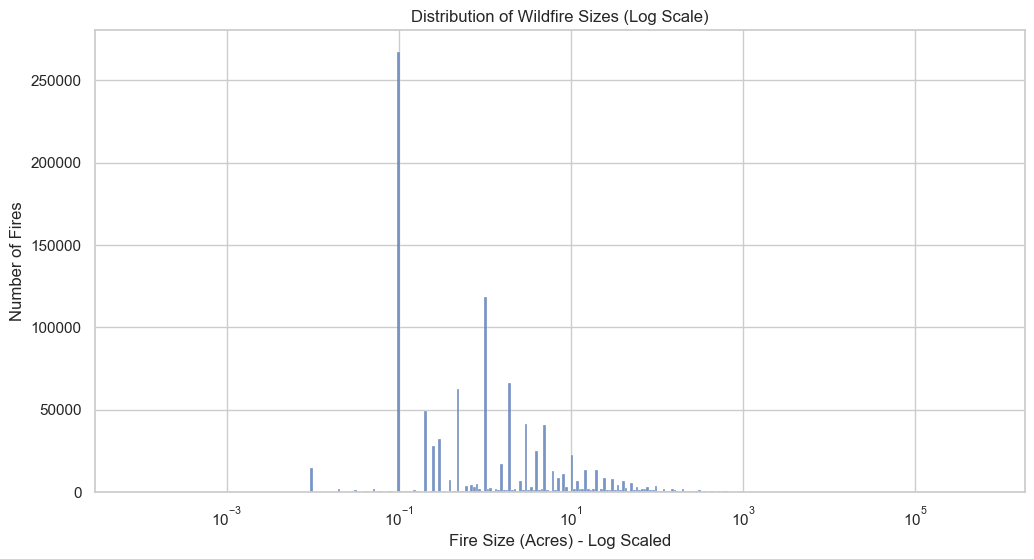

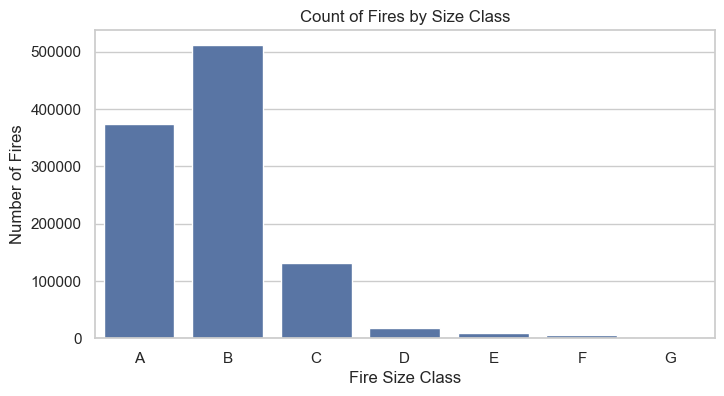

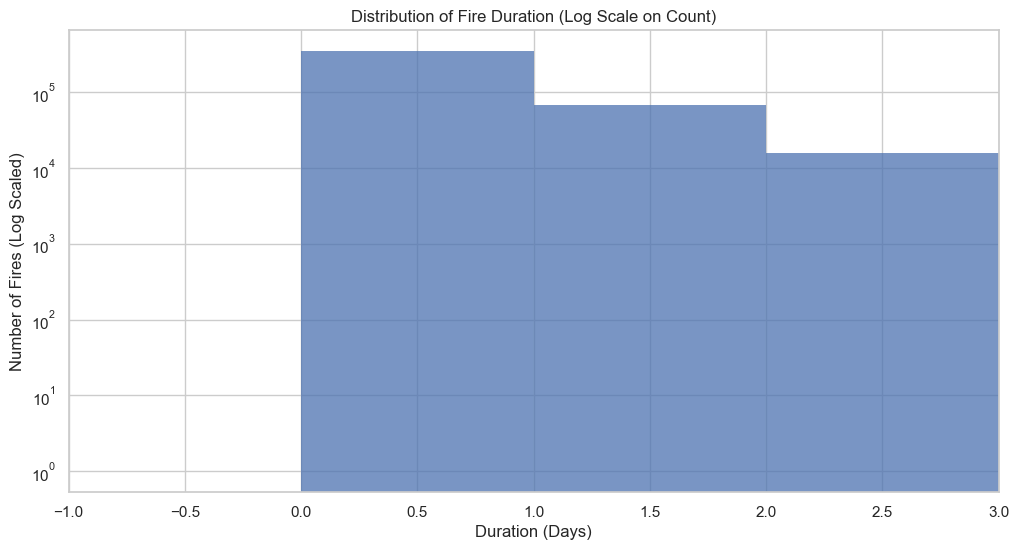

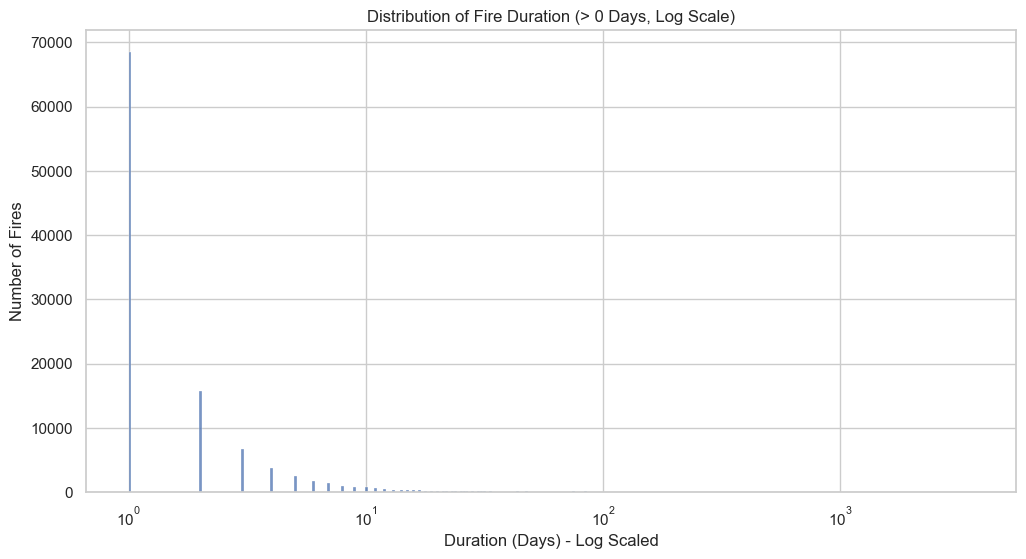

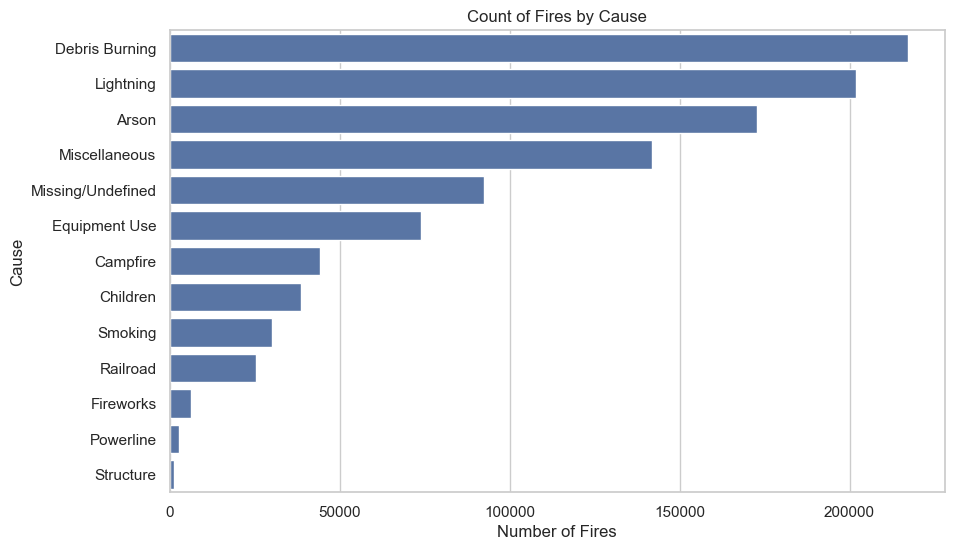

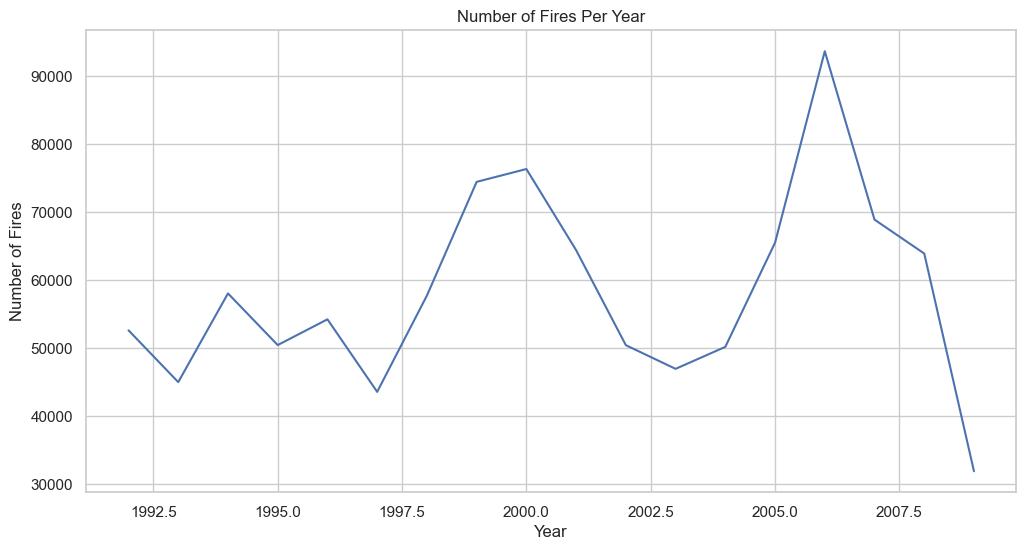

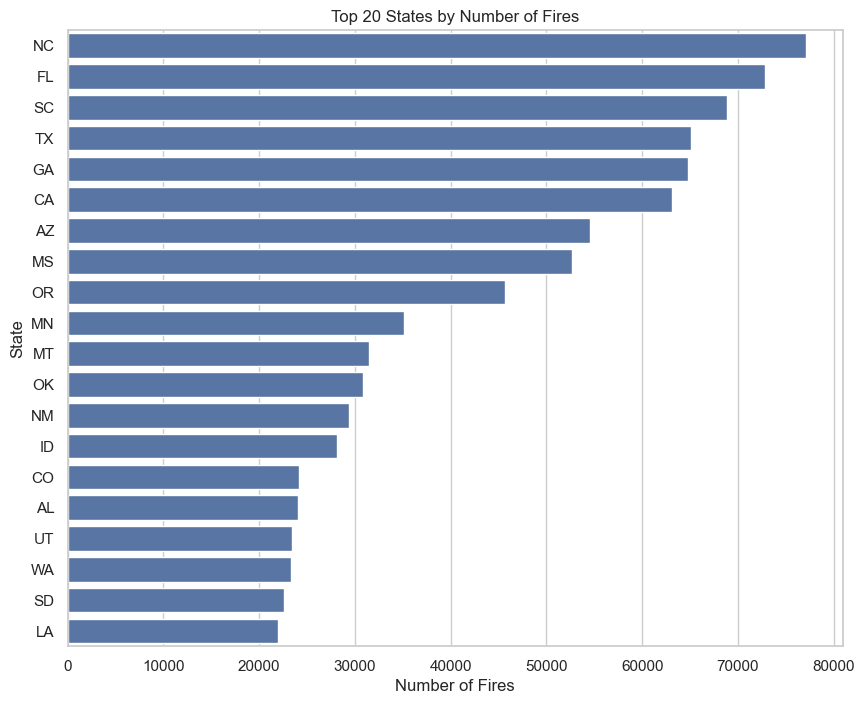

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# --- Visualize Fire Size ---
plt.figure(figsize=(12, 6))
# Histogram of FIRE_SIZE on a log scale
sns.histplot(data=wildfires_df, x='FIRE_SIZE', log_scale=True)
plt.title('Distribution of Wildfire Sizes (Log Scale)')
plt.xlabel('Fire Size (Acres) - Log Scaled')
plt.ylabel('Number of Fires')
plt.show()

plt.figure(figsize=(8, 4))
# Bar chart of FIRE_SIZE_CLASS
size_class_order = sorted(wildfires_df['FIRE_SIZE_CLASS'].unique()) # Order A, B, C...
sns.countplot(data=wildfires_df, x='FIRE_SIZE_CLASS', order=size_class_order)
plt.title('Count of Fires by Size Class')
plt.xlabel('Fire Size Class')
plt.ylabel('Number of Fires')
plt.show()

# --- 2. Visualize Fire Duration ---
# Note: 75% of calculated durations are 0 days.

plt.figure(figsize=(12, 6))
# Histogram of DURATION_DAYS.
sns.histplot(data=wildfires_df, x='DURATION_DAYS', binwidth=1) # Bin by day
plt.yscale('log') # Log scale for the count axis
plt.title('Distribution of Fire Duration (Log Scale on Count)')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Fires (Log Scaled)')
plt.xlim(-1, wildfires_df['DURATION_DAYS'].quantile(0.95)) # Zoom in on the bulk, excluding extreme outliers for now
plt.show()

# Look specifically at fires that lasted longer than a day
plt.figure(figsize=(12, 6))
duration_positive = wildfires_df[wildfires_df['DURATION_DAYS'] > 0]['DURATION_DAYS']
if not duration_positive.empty:
    sns.histplot(duration_positive, log_scale=True) # Log scale on X-axis now
    plt.title('Distribution of Fire Duration (> 0 Days, Log Scale)')
    plt.xlabel('Duration (Days) - Log Scaled')
    plt.ylabel('Number of Fires')
    plt.show()
else:
    print("No fires found with duration > 0 days.")


# --- Visualize Fire Cause ---
plt.figure(figsize=(10, 6))
# Bar chart of STAT_CAUSE_DESCR, ordered by frequency
sns.countplot(data=wildfires_df, y='STAT_CAUSE_DESCR', order=wildfires_df['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Count of Fires by Cause')
plt.xlabel('Number of Fires')
plt.ylabel('Cause')
plt.show()

# --- Visualize Fires Over Time ---
plt.figure(figsize=(12, 6))
fires_per_year = wildfires_df['FIRE_YEAR'].value_counts().sort_index()
sns.lineplot(x=fires_per_year.index, y=fires_per_year.values)
plt.title('Number of Fires Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()

# --- Visualize Fires by State (Top 20) ---
plt.figure(figsize=(10, 8))
top_n = 20
state_order = wildfires_df['STATE'].value_counts().nlargest(top_n).index
sns.countplot(data=wildfires_df, y='STATE', order=state_order)
plt.title(f'Top {top_n} States by Number of Fires')
plt.xlabel('Number of Fires')
plt.ylabel('State')
plt.show()